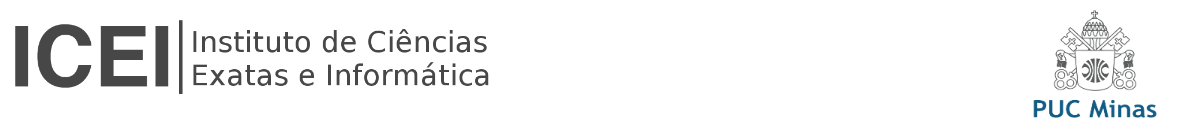

---

# Introdução ao Tensorflow - Parte 5

---

#### Professor: Felipe Reis

#### Data: 2023-05-20

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import random
import time

#import plot_images
from plot_helper import plot_helper as plotter

#tensorflow
import tensorflow as tf
from tensorflow.python.client import device_lib
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

---
### Importação de bibliotecas 

In [2]:
#código para compatibilidade de redes convolucionais com algumas placas de vídeo (ex.: série 16*)
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(sess)

---
## Base de Dados CIFAR-10

A base de dados CIFAR-10 consiste em 60.000 imagens coloridas de 32x32, divididas em 10 classes.
Cada classe contém 6.000 imagens por classe. 
O conjunto é dividido em 50.000 imagens de treinamento e 10.000 imagens de teste.

CIFAR é o acrônimo de Canadian Institute For Advanced Research, proprietário da base de dados.
O CIFAR-10 e CIFAR-100 são subconjuntos rotulados de uma base de dados de pequenas imagens que contém 80 milhões de amostras. 

As imagens foram coletadas por Alex Krizhevsky, Vinod Nair e Geoffrey Hinton.

A base está disponível em: https://www.cs.toronto.edu/~kriz/cifar.html

Ela também está disponível na página do Tensorflow: https://www.tensorflow.org/datasets/catalog/cifar10

![CIFAR 10](https://cdn-images-1.medium.com/max/1200/1*SZnidBt7CQ4Xqcag6rd8Ew.png)

Fonte: *Jannik Zürn. **Training a CIFAR-10 classifier in the cloud using TensorFlow and Google Colab**. 2018. Disponível em: https://jannik-zuern.medium.com/training-a-cifar-10-classifier-in-the-cloud-using-tensorflow-and-google-colab-f3a5fbdfe24d. Acesso em: 05 de outubro de 2021.*

In [3]:
#download da base de dados
cifar10 = keras.datasets.cifar10

#divisão em base de treinamento e testes (subdividido em imagens e labels)
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

#remove 1 dimensão dos arrays de label
train_labels = np.squeeze(train_labels)
test_labels = np.squeeze(test_labels)

170498071/170498071 [==============================] - 13s 0us/step


In [4]:
#impressão da quantidade de imagens da base
print('Conjunto treino: {} amostras'.format(len(train_images)))
print('Conjunto teste: {} amostras'.format(len(test_images)))

Conjunto treino: 50000 amostras
Conjunto teste: 10000 amostras


In [5]:
#definicao dos nomes das classes
class_names = ['Avião', 'Automóvel', 'Pássaro', 'Gato', 'Veado', 
               'Cachorro', 'Sapo', 'Cavalo', 'Barco', 'Caminhão']

### Análise dos Dados

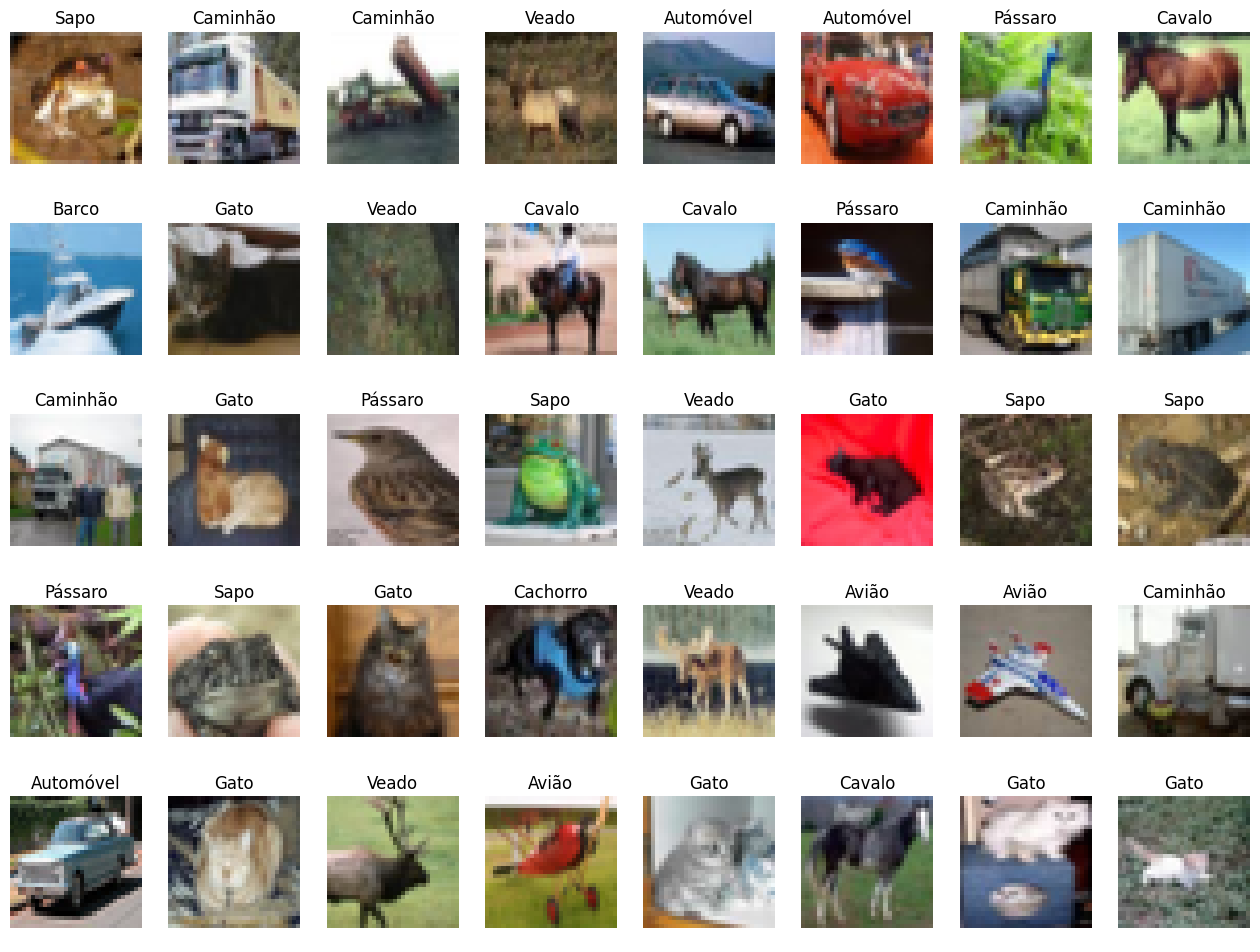

In [6]:
plotter.plot_images(train_images, train_labels, class_names, random=False)

---
## Pré processamento

Podemos classificar o conjunto de dados utilizando os mesmos modelos utilizados no Notebook 1.

In [7]:
#pré processamento
train_images = train_images / 255.0
test_images = test_images / 255.0

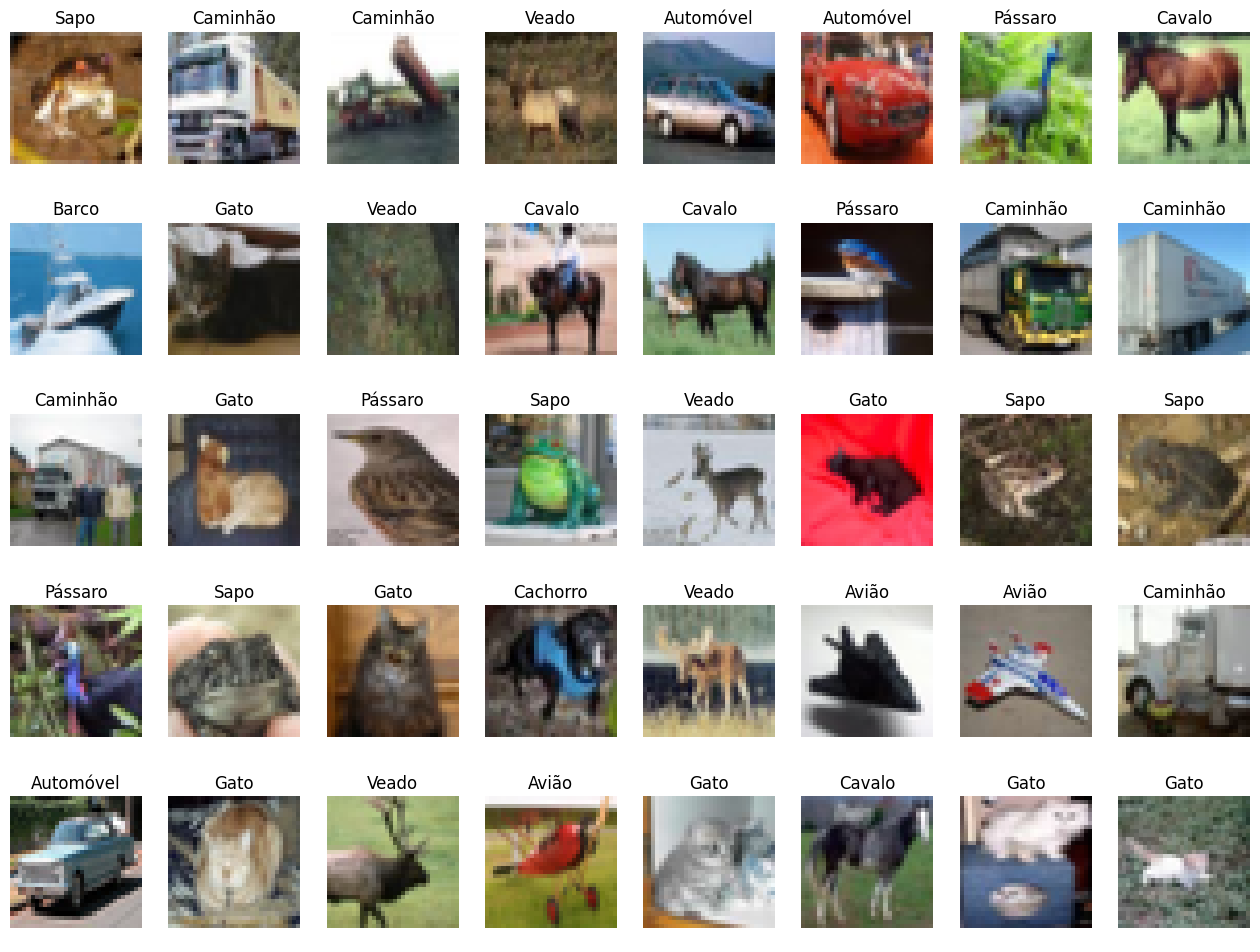

In [8]:
plotter.plot_images(train_images, train_labels, class_names, random=False)

---
## Redes Convolucionais

A rede neural abaixo é uma rede convolucional simples, contendo apenas uma camada convolucional.

Sua arquitetura é baseada no modelo existente no Notebook 1, com adição de uma cada de convolução.


#### Camada Convolucional

A camada convolucional executa um convolução de em duas dimensões (ex.: convolução espacial sobre imagens).

Essa camada cria um *kernel* de convolução que realiza a operação de convolução na entrada da camada para produzir um tensor de saídas. 

Para usá-la é necessário utilizar o comando `keras.layers.Conv2D`.

Mais informações em: https://keras.io/api/layers/convolution_layers/convolution2d/

In [9]:
def load_model_1():
    return keras.Sequential([
        #convolução com 32 nós
        keras.layers.Conv2D(32, 3, activation='relu'),

        #transforma a image em um array de imagens de duas dimensões (of 28 by 28 pixels)
        keras.layers.Flatten(input_shape=(28, 28)), 

        #Camada de dados totalmente conectadas, com ativação relu
        #A camada possui 128 nós (neurônios)
        keras.layers.Dense(128, activation='relu'),

        #Camada de dados totalmente conectadas, com ativação softmax
        #A camada possui 10 nós (neurônios), correspondentes às probabilidades de cada classe (10 classes)
        keras.layers.Dense(10, activation='softmax')
    ])

---
## Compilação do Modelo

Informações detalhadas sobre os métodos de otimização, perda e métricas serão exibidas nos próximos notebooks e nas parte teórica.

In [10]:
#gera modelo
model1 = load_model_1() #o modelo foi recarregado para melhor comparação dos otimizadores

#define o otimizador
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

#compila o modelo
model1.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#treina o modelo
history = model1.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 16s 4ms/step - loss: 1.4773 - accuracy: 0.4727
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1879 - accuracy: 0.5817
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0423 - accuracy: 0.6350
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9169 - accuracy: 0.6810
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8091 - accuracy: 0.7172
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7112 - accuracy: 0.7516
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6208 - accuracy: 0.7807
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5263 - accuracy: 0.8199
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4359 - accuracy: 0.8495
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.36

### Principais Parâmetros 

As camadas convolucionais possuem diversos parâmetros, que podem ser utilizados para ajuste do modelo.

Os parâmetros principais (ou mais utilizados) estão descritos abaixo.

*obs.: A alteração dos parâmetros pode não ser trivial, podendo requerer adequação das camadas seguintes. O cálculo de saída de uma camada convolucional não será descrito neste documento.*

Mais informações em: https://keras.io/api/layers/convolution_layers/convolution2d/

#### *Filters*

Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).
Números de filtros de saída da convolução.

Pode ser associada à profundidade em um modelo convolucional.

![filters](https://cs231n.github.io/assets/cnn/cnn.jpeg)

Fonte: *Li, F.-F., Krishna, R., and Xu, D. **Convolutional neural networks (cnns / convnets)**. 2021. Disponível em: https://cs231n.github.io/convolutional-networks/. Acesso em: 26 de Janeiro de 2021.*

#### Kernel Size

Tamanho do *kernel* que desliza sobre a imagem durante o processo de convolução.

São definidos por um tupla de 2 inteiros, correspondente ao largura e altura do filtro. 

![kernel](https://miro.medium.com/max/667/1*naUX8KsDblRJebhrqERtBw.png)

Fonte: *Yunus, M. **11 Artificial Neural Network (ANN) — Part 6 Konsep Dasar Convolutional Neural Network (CNN).**. 2020. Disponível em: https://yunusmuhammad007.medium.com/11-artificial-neural-network-ann-part-6-konsep-dasar-convolutional-neural-network-cnn-3cc10fd9cf69 . Acesso em: 26 de Janeiro de 2021.*

#### *Strides*

Corresponde à taxa de "deslizamento" dos *kernels*, em pixels.

São definidos por um tupla de 2 inteiros, correspondente ao largura e altura do filtro. 

#### *Padding*

*Padding* ou *zero-padding* corresponde ao parâmetro correspondente à adição de zeros à margem da imagem para que a saída de uma convolução tenha um tamanho (largura e altura) desejado.

O parâmetros pode receber valores como "*valid*" ou "*same*", de modo a gerenciar a saída de dados. 

![padding](https://miro.medium.com/max/667/1*Ch4NraXzYjdZrSoA9sGZTg.png)

Fonte: *Yunus, M. **11 Artificial Neural Network (ANN) — Part 6 Konsep Dasar Convolutional Neural Network (CNN).**. 2020. Disponível em: https://yunusmuhammad007.medium.com/11-artificial-neural-network-ann-part-6-konsep-dasar-convolutional-neural-network-cnn-3cc10fd9cf69 . Acesso em: 26 de Janeiro de 2021.*

#### Alteração da quantidade de filtros

Podemos gerar um novo modelo, com alteração da quantidade de filtros.

In [11]:
def load_model_2():
    return keras.Sequential([
        #convolução com 32 nós
        keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid',
                            input_shape=(32,32,3), activation='relu'),
        
        #transforma a image em um array de imagens de duas dimensões (of 28 by 28 pixels)
        keras.layers.Flatten(input_shape=(28, 28)), 

        #Camada de dados totalmente conectadas, com ativação relu
        #A camada possui 128 nós (neurônios)
        keras.layers.Dense(128, activation='relu'),

        #Camada de dados totalmente conectadas, com ativação softmax
        #A camada possui 10 nós (neurônios), correspondentes às probabilidades de cada classe (10 classes)
        keras.layers.Dense(10, activation='softmax')
    ])

In [12]:
#gera modelo
model2 = load_model_2() #o modelo foi recarregado para melhor comparação dos otimizadores

#define o otimizador
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

#compila o modelo
model2.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#treina o modelo
history = model2.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.4548 - accuracy: 0.4817
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1236 - accuracy: 0.6053
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9416 - accuracy: 0.6700
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7810 - accuracy: 0.7277
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6239 - accuracy: 0.7837
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4931 - accuracy: 0.8300
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.3688 - accuracy: 0.8725
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.2816 - accuracy: 0.9046
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2157 - accuracy: 0.9286
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.168

#### Alteração do parâmetro *kernel_size*

Podemos gerar um novo modelo, com alteração do parâmetro *kernel_size*.

In [13]:
def load_model_3():
    return keras.Sequential([
        #convolução com 32 nós
        keras.layers.Conv2D(filters=64, kernel_size=(5,5), strides=(1,1), padding='valid',
                            input_shape=(32,32,3), activation='relu'),
        
        #transforma a image em um array de imagens de duas dimensões (of 28 by 28 pixels)
        keras.layers.Flatten(input_shape=(28, 28)), 

        #Camada de dados totalmente conectadas, com ativação relu
        #A camada possui 128 nós (neurônios)
        keras.layers.Dense(128, activation='relu'),

        #Camada de dados totalmente conectadas, com ativação softmax
        #A camada possui 10 nós (neurônios), correspondentes às probabilidades de cada classe (10 classes)
        keras.layers.Dense(10, activation='softmax')
    ])

In [14]:
#gera modelo
model3 = load_model_3() #o modelo foi recarregado para melhor comparação dos otimizadores

#define o otimizador
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

#compila o modelo
model3.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#treina o modelo
history = model3.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 8s 4ms/step - loss: 1.5508 - accuracy: 0.4495
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2181 - accuracy: 0.5724
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0136 - accuracy: 0.6452
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8450 - accuracy: 0.7038
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6733 - accuracy: 0.7643
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5388 - accuracy: 0.8113
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4068 - accuracy: 0.8609
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3141 - accuracy: 0.8940
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2486 - accuracy: 0.9177
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.203

#### Alteração do parâmetro *strides*

Podemos gerar um novo modelo, com alteração do parâmetro *stride*.

In [15]:
def load_model_4():
    return keras.Sequential([
        #convolução com 32 nós
        keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(3,3), padding='valid',
                            input_shape=(32,32,3), activation='relu'),
        
        #transforma a image em um array de imagens de duas dimensões (of 28 by 28 pixels)
        keras.layers.Flatten(input_shape=(28, 28)), 

        #Camada de dados totalmente conectadas, com ativação relu
        #A camada possui 128 nós (neurônios)
        keras.layers.Dense(128, activation='relu'),

        #Camada de dados totalmente conectadas, com ativação softmax
        #A camada possui 10 nós (neurônios), correspondentes às probabilidades de cada classe (10 classes)
        keras.layers.Dense(10, activation='softmax')
    ])

In [16]:
#gera modelo
model4 = load_model_4() #o modelo foi recarregado para melhor comparação dos otimizadores

#define o otimizador
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

#compila o modelo
model4.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#treina o modelo
history = model4.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 1.5668 - accuracy: 0.4422
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2806 - accuracy: 0.5484
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1652 - accuracy: 0.5902
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0689 - accuracy: 0.6260
Epoch 5/10
1563/1563 [==============================] - 5s 4ms/step - loss: 0.9914 - accuracy: 0.6531
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9162 - accuracy: 0.6790
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8400 - accuracy: 0.7052
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7715 - accuracy: 0.7306
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7075 - accuracy: 0.7504
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.643

## Pooling

A função de pooling é utilizada para prover informação estatística a respeito das saídas próximas.

Tem como objetivo maximizar as vantagens da saída e tornar-se invariante a pequenos ruídos.

Podem também ser utilizadas para redução da quantidade de neurônios entre camadas da rede, agrupando resultados na
camada seguinte.

O método de *pooling* mais utilizado é o MaxPooling (Pooling Máximo). Para usá-lo é necessário utilizar o comando `keras.layers.MaxPooling2D`.

Mais informações: https://keras.io/api/layers/pooling_layers/

![Pooling](https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png)

Fonte: *Computer Science Wiki. **Max-pooling / Pooling**. 2020. Disponível em: https://computersciencewiki.org/index.php/Max-pooling_/_Pooling. Acesso em: 08 de Setembro de 2020.* 


In [17]:
def load_model_5():
    return keras.Sequential([
        #convolução com 32 nós
        keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(3,3), padding='valid',
                            input_shape=(32,32,3), activation='relu'),
        
        keras.layers.MaxPooling2D(pool_size=(2,2)),
        
        #transforma a image em um array de imagens de duas dimensões (of 28 by 28 pixels)
        keras.layers.Flatten(input_shape=(28, 28)), 

        #Camada de dados totalmente conectadas, com ativação relu
        #A camada possui 128 nós (neurônios)
        keras.layers.Dense(128, activation='relu'),

        #Camada de dados totalmente conectadas, com ativação softmax
        #A camada possui 10 nós (neurônios), correspondentes às probabilidades de cada classe (10 classes)
        keras.layers.Dense(10, activation='softmax')
    ])

In [18]:
#gera modelo
model5 = load_model_5() #o modelo foi recarregado para melhor comparação dos otimizadores

#define o otimizador
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

#compila o modelo
model5.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#treina o modelo
history = model5.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 1.5404 - accuracy: 0.4490
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2966 - accuracy: 0.5402
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1976 - accuracy: 0.5766
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1266 - accuracy: 0.6035
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0656 - accuracy: 0.6257
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0124 - accuracy: 0.6455
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9665 - accuracy: 0.6602
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9227 - accuracy: 0.6752
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8825 - accuracy: 0.6905
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.844

---
## Aumento Artificial de Dados (*Data Augmentation*)

Podemos diminuir o sobretreinamento (*overfitting*), por meio da criação de registros artificiais. Esse processo é conhecido como *data augmentation*.

O aumento artificial de dados dificulta o reconhecimento de amostras ("rede decora amostras") e favorece a capacidade de generalização.

Nas redes convolucionais previamente estudadas, pode ser percebido a existência de *overfitting*, quando dividimos os conjuntos em treinamento e validação.

Observa-se um crescimento da acurácia no conjunto de treinamento e a manutenção do desempenho no conjunto de validação.

Epoch 1/10
1250/1250 [==============================] - 6s 4ms/step - loss: 1.4800 - accuracy: 0.4732 - val_loss: 1.2708 - val_accuracy: 0.5529
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1591 - accuracy: 0.5938 - val_loss: 1.2197 - val_accuracy: 0.5782
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9822 - accuracy: 0.6577 - val_loss: 1.2227 - val_accuracy: 0.5841
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8277 - accuracy: 0.7118 - val_loss: 1.1579 - val_accuracy: 0.6102
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.6807 - accuracy: 0.7631 - val_loss: 1.1946 - val_accuracy: 0.6184
Epoch 6/10
1250/1250 [==============================] - 4s 4ms/step - loss: 0.5419 - accuracy: 0.8126 - val_loss: 1.2665 - val_accuracy: 0.6143
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.4198 - accuracy: 0.8562 - val_loss: 1.4555 - val_accuracy:

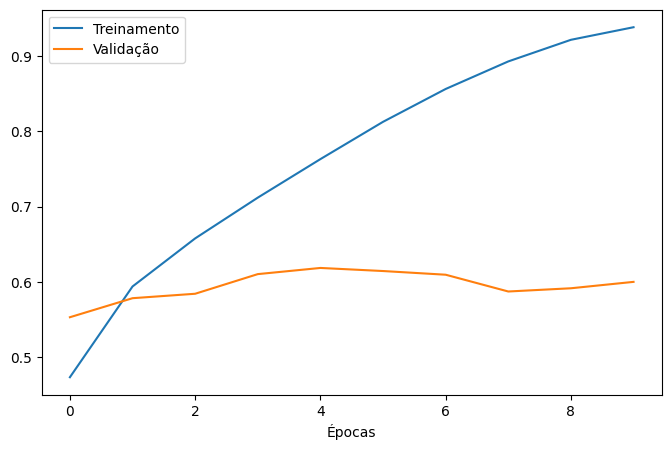

In [19]:
#gera modelo
model1 = load_model_1() #o modelo foi recarregado para melhor comparação dos otimizadores

#define o otimizador
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

#compila o modelo
model1.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#treina o modelo
history = model1.fit(train_images, train_labels, validation_split=0.2, epochs=10)

# plota o gráfico
plotter.plot_history_training(history, metrics=['accuracy', 'val_accuracy'], legend=['Treinamento', 'Validação'])

### Data Augmentation

Para aumento dos dados, é possível utilizar diferentes recursos computacionais, como bibliotecas e frameworks específicos para esse propósito.

O Tensorflow é capaz de gerar dados de diferentes formas. Por questões didáticas, optaremos por um gerador de imagem simples, provido pela interface do Keras.

Esse gerador é denominado `ImageDataGenerator`.

Ele é capaz de fazer diversas transformações nas imagens, como espelhamento, rotação, normalização da imagem, deslocamento de *pixels*, entre outros.

Outras funcionalidades também pode acrescentar opções como *blur*, aumento de saturação, adição de ruídos, aplicação de filtros, entre outros.

![Data augmentation](https://algorithmia.com/blog/wp-content/uploads/2018/08/word-image-8.png)

Fonte: *Algorithmia. **Introduction to Dataset Augmentation and Expansion**. 2018. Disponível em: https://algorithmia.com/blog/introduction-to-dataset-augmentation-and-expansion . Acesso em: 17 de outubro de 2021.*

Mais informações: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

#### ImageDataGenerator

Para usar o `ImageDataGenerator`, precisamos criar um gerador de imagem e definir quais as transformações iremos realizar.

Quanto mais transformações utilizarmos, mais amostras iremos processar (consequentemente mais tempo a rede irá demorar para treinar).

In [20]:
datagen = ImageDataGenerator(
    featurewise_center=True,             #Normaliza a imagem de modo que ela tenha média zero
    featurewise_std_normalization=True,  #Normaliza a entrada para média de cores dos pixel da base de dados
    rotation_range=20,                   #intervalo de rotação
    width_shift_range=0.2,               #intervalo de deslocamento de pixels na largura
    height_shift_range=0.2,              #intervalo de deslocamento de pixels na altura
    horizontal_flip=True,                #espelhamento horizontal
    validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


1250/1250 [==============================] - 32s 25ms/step - loss: 1.7795 - accuracy: 0.3564 - val_loss: 1.6161 - val_accuracy: 0.4092
Epoch 2/10
1250/1250 [==============================] - 31s 25ms/step - loss: 1.5734 - accuracy: 0.4367 - val_loss: 1.5293 - val_accuracy: 0.4483
Epoch 3/10
1250/1250 [==============================] - 31s 25ms/step - loss: 1.5256 - accuracy: 0.4511 - val_loss: 1.4824 - val_accuracy: 0.4703
Epoch 4/10
1250/1250 [==============================] - 32s 25ms/step - loss: 1.4949 - accuracy: 0.4609 - val_loss: 1.4938 - val_accuracy: 0.4663
Epoch 5/10
1250/1250 [==============================] - 31s 25ms/step - loss: 1.4798 - accuracy: 0.4667 - val_loss: 1.4803 - val_accuracy: 0.4624
Epoch 6/10
1250/1250 [==============================] - 32s 25ms/step - loss: 1.4545 - accuracy: 0.4773 - val_loss: 1.4116 - val_accuracy: 0.4950
Epoch 7/10
1250/1250 [==============================] - 34s 27ms/step - loss: 1.4445 - accuracy: 0.4795 - val_loss: 1.4439 - val_accura

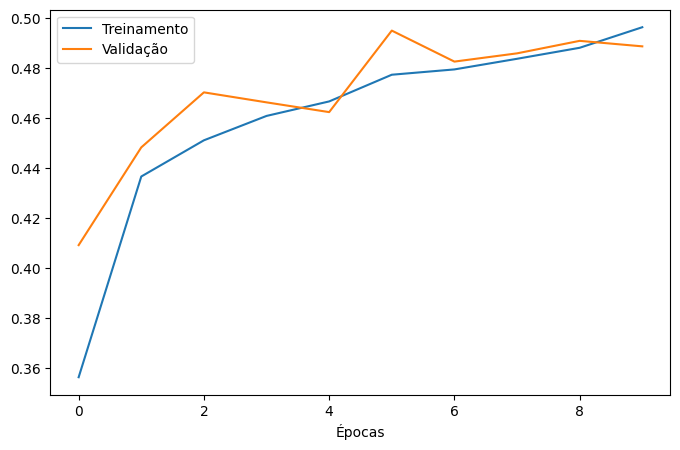

In [21]:
#gera modelo
model1 = load_model_1() #o modelo foi recarregado para melhor comparação dos otimizadores

#define o otimizador
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

#compila o modelo
model1.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#compila o modelo
model1.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#treina o modelo
history = model1.fit(datagen.flow(train_images, train_labels, batch_size=32, subset='training'), 
           validation_data=datagen.flow(train_images, train_labels, batch_size=8, subset='validation'),
           epochs=10)

# plota o gráfico
plotter.plot_history_training(history, metrics=['accuracy', 'val_accuracy'], legend=['Treinamento', 'Validação'])

----
----

## Tarefas 

### Tarefa 1 (20 minutos)

Treine a rede convolucional abaixo no conjunto de dados CIFAR-10.

#### Atividades Sugeridas

- Inclua rotinas de aumento artificial de dados;
- Varie as taxas de aprendizado e decaimento da rede;
- Plote gráficos para verificar a existência de overfitting.

In [22]:
def load_model():
    return keras.Sequential([
        keras.layers.Conv2D(32, (3,3), input_shape=(32,32,3), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2,2)),
        keras.layers.Conv2D(64, (5,5), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(3,3)),
        keras.layers.Conv2D(64, (3,3), activation='relu'),
        keras.layers.Flatten(), 
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])

In [23]:
#compile seu modelo aqui

In [24]:
#treine seu modelo aqui

In [25]:
#imprima o gráfico de treinamento aqui

In [26]:
#avalie seu modelo aqui

----

### Tarefa 2 (30 minutos)

Treine a rede convolucional abaixo no conjunto de dados Flowers.

https://www.tensorflow.org/datasets/catalog/tf_flowers

#### Atividades Sugeridas

- Inclua rotinas de aumento artificial de dados;
- Varie as taxas de aprendizado e decaimento da rede;
- Plote gráficos para verificar a existência de overfitting.

In [27]:
def load_model():
    return keras.Sequential([
        keras.layers.Conv2D(32, (3,3), input_shape=(32,32,3), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2,2)),
        keras.layers.Conv2D(64, (5,5), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(3,3)),
        keras.layers.Conv2D(64, (3,3), activation='relu'),
        keras.layers.Flatten(), 
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])

In [28]:
#compile seu modelo aqui

In [29]:
#treine seu modelo aqui

In [30]:
#imprima o gráfico de treinamento aqui

In [31]:
#avalie seu modelo aqui

----

### Tarefa 3 (60 minutos)

Treine a rede convolucional no conjunto de dados Stanford Dogs.

https://www.tensorflow.org/datasets/catalog/stanford_dogs

#### Atividades Sugeridas

- Inclua rotinas de aumento artificial de dados;
- Varie as taxas de aprendizado e decaimento da rede;
- Plote gráficos para verificar a existência de overfitting.

In [32]:
def load_model():
    return keras.Sequential([
        keras.layers.Conv2D(32, (3,3), input_shape=(32,32,3), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2,2)),
        keras.layers.Conv2D(64, (5,5), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(3,3)),
        keras.layers.Conv2D(64, (3,3), activation='relu'),
        keras.layers.Flatten(), 
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])

In [33]:
#compile seu modelo aqui

In [34]:
#treine seu modelo aqui

In [35]:
#imprima o gráfico de treinamento aqui

In [36]:
#avalie seu modelo aqui